## **Decision Tree**

### **1. What is a Decision Tree, and how does it work?**
A **Decision Tree** is a flowchart-like structure used for classification and regression tasks. It splits the dataset into subsets based on feature values, with each node representing a test on a feature, each branch representing the outcome, and each leaf node a final prediction.
It works recursively by selecting the best feature and threshold that maximize some metric (like Information Gain or Gini reduction), partitioning the data until stopping criteria are met.

### **2. What are impurity measures in Decision Trees?**
Impurity measures determine how mixed the classes are in a dataset:
- **Gini Impurity**: Measures the probability of incorrectly classifying a randomly chosen element.
- **Entropy**: Measures the level of disorder or unpredictability in the dataset.

These are used to decide the best splits while building the tree.

### **3. What is the mathematical formula for Gini Impurity?**
For a node with classes $C = \{c_1, c_2, ..., c_n\}$:
$$
Gini = 1 - \sum_{i=1}^{n} p_i^2
$$
Where $p_i$ is the proportion of class $c_i$ in the node.

### **4. What is the mathematical formula for Entropy?**
For a node with classes $ C = \{c_1, c_2, ..., c_n\} $:
$
[ Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i) ]
$
Where $ p_i $ is the probability of class $ c_i $ in the node.

### **5. What is Information Gain, and how is it used in Decision Trees?**
**Information Gain (IG)** measures the reduction in impurity (Entropy or Gini) after a split:
$ IG(D, A) = I(D) - \sum_{v \in Values(A)} \frac{|D_v|}{|D|} I(D_v) $
Where $ I $ is impurity, $ D $ is the dataset, and $ A $ is the attribute. IG is used to select the best split.

### **6. What is the difference between Gini Impurity and Entropy?**
- **Gini** is computationally simpler and faster.
- **Entropy** is derived from information theory and penalizes impurity more heavily.
- Both often lead to similar splits, but Gini tends to isolate the most frequent class more quickly.

### **7. What is the mathematical explanation behind Decision Trees?**
Decision Trees use a greedy algorithm (like ID3 or CART) to:
1. Compute an impurity score (Gini or Entropy) for each feature split.
2. Select the split that gives the highest Information Gain.
3. Recursively partition the dataset until stopping criteria are met (e.g., max depth, min samples, or pure nodes).

### **8. What is Pre-Pruning in Decision Trees?**
**Pre-Pruning** stops tree growth early by applying constraints like:
- Maximum depth
- Minimum samples per leaf
- Minimum information gain

It helps prevent overfitting but risks underfitting.

### **9. What is Post-Pruning in Decision Trees?**
**Post-Pruning** allows the tree to grow fully, then removes branches that don't add value based on a validation set.

Common techniques: Reduced Error Pruning, Cost Complexity Pruning (CART).

It typically leads to better generalization than pre-pruning.

### **10. What is the difference between Pre-Pruning and Post-Pruning?**
| Aspect         | Pre-Pruning                      | Post-Pruning                     |
|----------------|----------------------------------|----------------------------------|
| Timing         | Before full growth               | After full tree is grown         |
| Simplicity     | Faster, simpler                  | Requires validation set          |
| Risk           | Underfitting                     | Less risk of underfitting        |

### **11. What is a Decision Tree Regressor?**
A **Decision Tree Regressor** predicts continuous values instead of classes. It minimizes **mean squared error (MSE)** or **mean absolute error (MAE)** at each split.
Leaf nodes output the mean of target values in that partition.

### **12. What are the advantages and disadvantages of Decision Trees?**
**Advantages:**
- Easy to interpret
- No need for feature scaling
- Works for both classification and regression

**Disadvantages:**
- Prone to overfitting
- Unstable to small changes
- Greedy nature may miss global optimum

### **13. How does a Decision Tree handle missing values?**
Strategies include:
- Ignore samples with missing values
- Use surrogate splits (CART)
- Impute missing values before training
- Distribute samples based on probabilities across branches

### **14. How does a Decision Tree handle categorical features?**
- By evaluating splits on equality or membership (e.g., "feature == value" or "feature in set")
- Some implementations automatically handle encoding; others require one-hot or ordinal encoding.

### **15. What are some real-world applications of Decision Trees?**
- Medical diagnosis
- Credit scoring and loan eligibility
- Fraud detection
- Customer segmentation
- Predictive maintenance

## **Practicle**

In [ ]:
# 16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 1.0


In [2]:
# 17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)
print("Feature importances (Gini):", clf_gini.feature_importances_)

Feature importances (Gini): [0.03575134 0.         0.39794324 0.56630542]


In [4]:
# 18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
print("Accuracy (Entropy):", accuracy_score(y_test, clf_entropy.predict(X_test)))

Accuracy (Entropy): 0.9736842105263158


In [5]:
# 19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
Xh_train, Xh_test, yh_train, yh_test = train_test_split(housing.data, housing.target, random_state=42)
reg = DecisionTreeRegressor()
reg.fit(Xh_train, yh_train)
print("MSE:", mean_squared_error(yh_test, reg.predict(Xh_test)))

MSE: 0.5251870412524224


In [ ]:
# 20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
graphviz.Source(dot_data)

In [7]:
# 21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree
clf_limited = DecisionTreeClassifier(max_depth=3)
clf_limited.fit(X_train, y_train)
print("Accuracy (max_depth=3):", accuracy_score(y_test, clf_limited.predict(X_test)))
print("Accuracy (full tree):", accuracy_score(y_test, clf.predict(X_test)))

Accuracy (max_depth=3): 1.0
Accuracy (full tree): 1.0


In [8]:
# 22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree
clf_split5 = DecisionTreeClassifier(min_samples_split=5)
clf_split5.fit(X_train, y_train)
print("Accuracy (min_samples_split=5):", accuracy_score(y_test, clf_split5.predict(X_test)))
print("Accuracy (default):", accuracy_score(y_test, clf.predict(X_test)))

Accuracy (min_samples_split=5): 1.0
Accuracy (default): 1.0


In [9]:
# 23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_scaled, y_train)
print("Accuracy (scaled):", accuracy_score(y_test, clf_scaled.predict(X_test_scaled)))
print("Accuracy (unscaled):", accuracy_score(y_test, clf.predict(X_test)))

Accuracy (scaled): 1.0
Accuracy (unscaled): 1.0


In [10]:
# 24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train, y_train)
print("Accuracy (OvR):", ovr_clf.score(X_test, y_test))

Accuracy (OvR): 1.0


In [11]:
# 25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores.
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Feature importances:", clf.feature_importances_)

Feature importances: [0.01787567 0.01787567 0.88187037 0.08237829]


In [12]:
# 26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.
reg_limited = DecisionTreeRegressor(max_depth=5)
reg_limited.fit(Xh_train, yh_train)
print("MSE (max_depth=5):", mean_squared_error(yh_test, reg_limited.predict(Xh_test)))
print("MSE (full tree):", mean_squared_error(yh_test, reg.predict(Xh_test)))

MSE (max_depth=5): 0.526799989691142
MSE (full tree): 0.5251870412524224


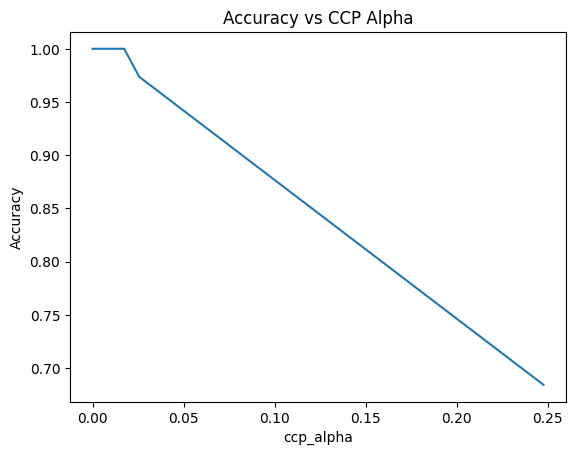

In [13]:
# 27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
clfs = [DecisionTreeClassifier(ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]
accs = [accuracy_score(y_test, clf_.predict(X_test)) for clf_ in clfs]
import matplotlib.pyplot as plt
plt.plot(ccp_alphas, accs)
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs CCP Alpha')
plt.show()

In [14]:
# 28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test), target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



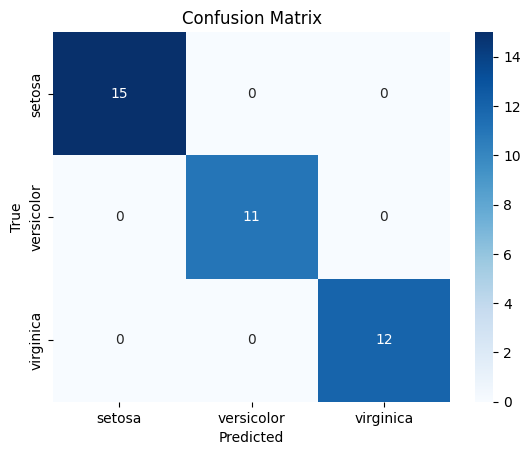

In [15]:
# 29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# 30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
print("Test Accuracy:", accuracy_score(y_test, grid.predict(X_test)))

Best Parameters: {'max_depth': 4, 'min_samples_split': 2}
Best Score: 0.9367588932806324
Test Accuracy: 1.0
